<a href="https://colab.research.google.com/github/007tickooayush/ML-Classification-Cardiovascular-Risk-Prediction-Project/blob/master/Ayush_Tickoo_ML_Capstone_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Contributor**     - Ayush Tickoo

# **Project Summary -**

In this project we have 15 features available to work on (age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD). Firstly we will be exploring the dataset and draw out the findings related to the dataset available. The initial step will be checking the null, empty and missing values in the dataset and treating them before the exploratory data analysis is started, mainly known as data preprocessing. After the dataset is ready we will explore the dataset and draw out heuristics along with univariate, bivariate and multivariate analysis and visualizations. And from the findings gathered after the EDA we will start with feature engineering and perform manipulations on the dataset to make it ready for model implementation. Before model implementation the data will be scaled and split into train and test set with some appropriate ratio. After that the Classifier models will be trained using the dataset.
To get the best possible fit hyper-parameter tuning will be applied as well, and based on the evaluation metrics will be validated which of the models implemented is the best to apply in the provided use case of Cardiovascular risk prediction.


# **GitHub Link -**

[Project Github Link](https://github.com/007tickooayush/ML-Classification-Cardiovascular-Risk-Prediction-Project)

# **Problem Statement**


**The dataset is from a cardiovascular study on residents of the tower of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The dataset provides the patients’ information. It includes approximately 4000 records and 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors available in the dataset.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
from numpy import math
import numpy as np
from numpy import nan
import pandas as pd
import missingno as msno

from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# to reduce the deprecated method and other unnecessary warning messages from the console
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

Mounted at /content/drive


Import the CSV File

In [4]:
# Load Dataset
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.3_Classification_Project/Ayush Tickoo ML Classification Project [Capstone Project]/data/'
df = pd.read_csv(dir_path+'data_cardiovascular_risk.csv')

In [5]:
# create a backup of the datafame
df_bkup = df.copy()

### Dataset First View

In [6]:
# Dataset First Look
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
# Target Variables value counts
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [8]:
# Percentage composition of Classes
df['TenYearCHD'].value_counts() / len(df) * 100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print('Duplicate Values in the Dataset =',df.duplicated().sum())

Duplicate Values in the Dataset = 0


#### Missing Values/Null Values

In [13]:
# Missing/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [14]:
# Percentage of missing/null values
df.isnull().sum()/len(df) * 100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

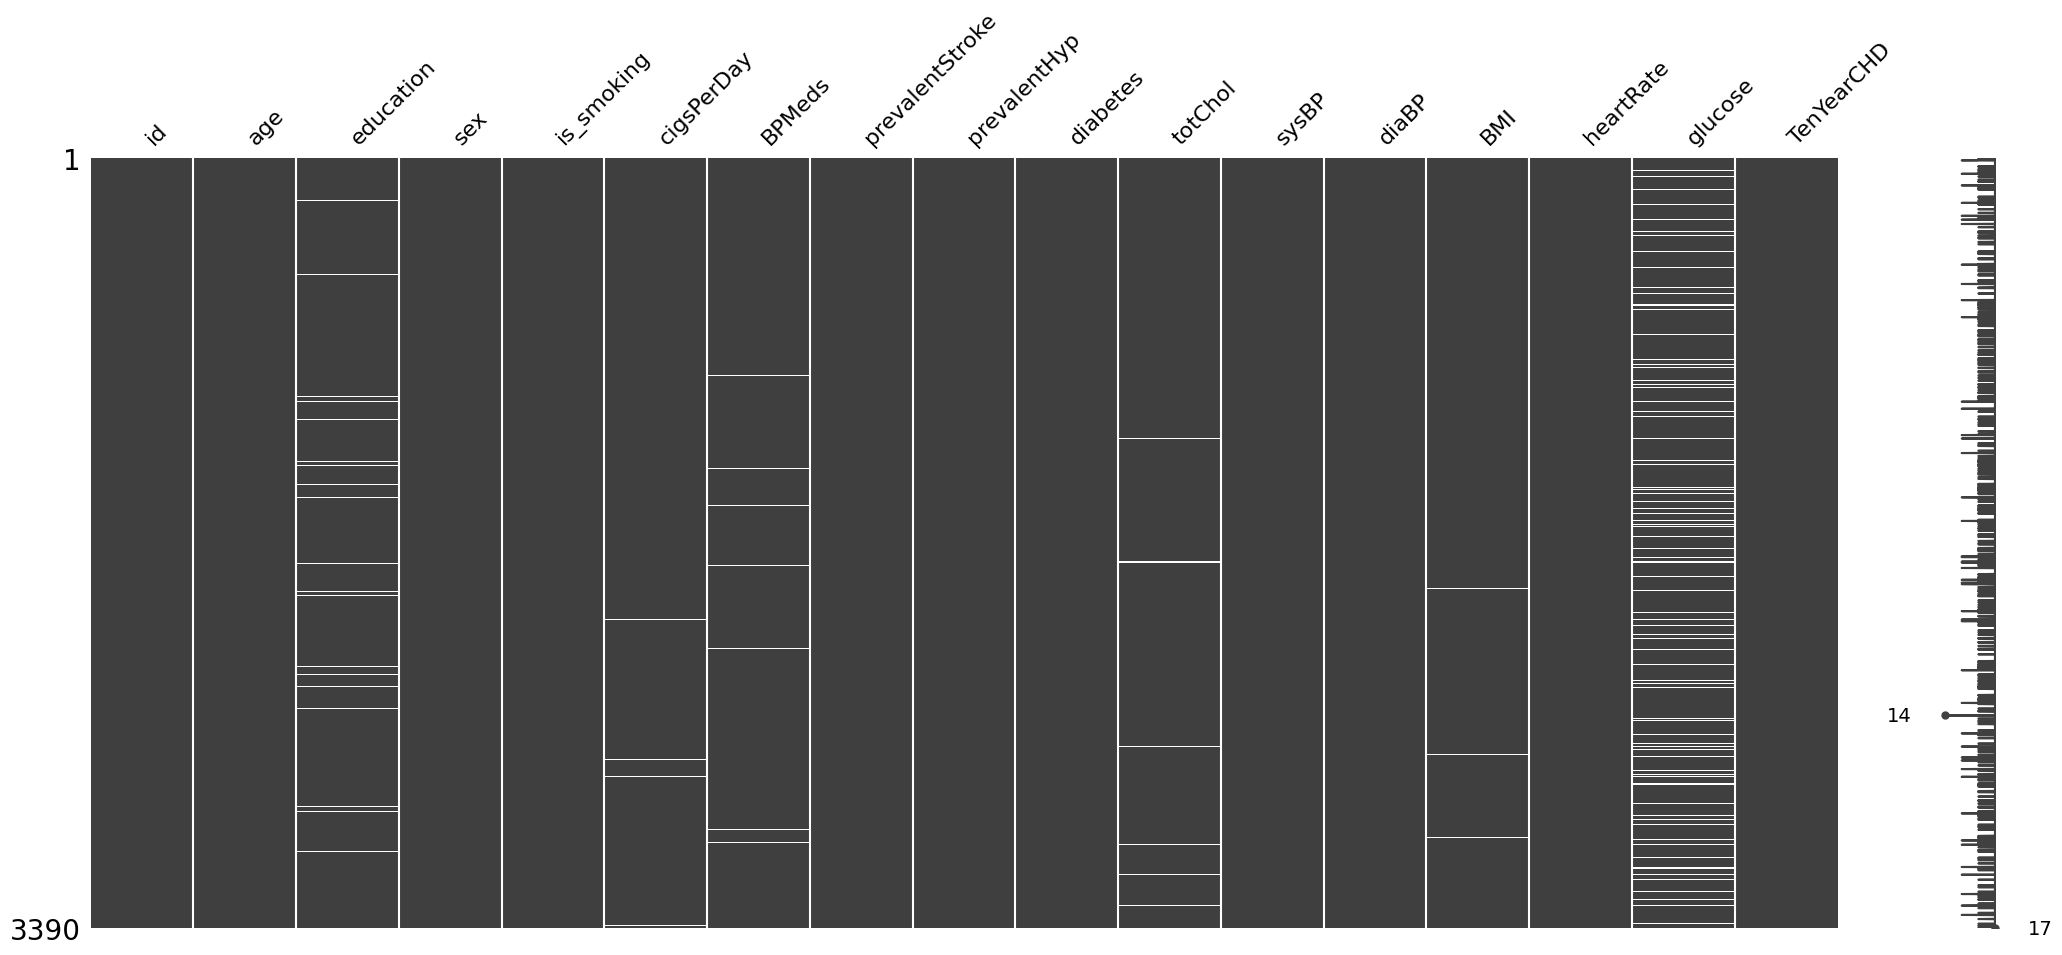

In [15]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

### What did you know about your dataset?

In the provided dataset there is less percentage of missing values throughout the dataset, and the values are missing in a very distributed manner rather than in a grouped manner for the rows as it is shown in the visual representation of the same. 

The variable glucose has the highest number of missing/null values. 

There are some variables such as `sex` and `is_smoking` that can be encoded to get numerical(binary) representation of the variables which can be more useful for the process.

Also we have a major imbalance between the classes in of dataset provided.

The continuous numerical variables found are `diabetes`, `totChol`, `cigsPerDay` , `BMI`, `diaBP`, `sysBP` and `glucose`.

We can continue with the data preprocessing and visualization to gain more insights about the relation of variables and know more about the data.


## ***Understanding Your Variables***

In [16]:
# Dataset Columns
columns_str = [i for i in df.columns.values]

print('The columns available are:')
print(str(columns_str).replace("'",""))

The columns available are:
[id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]


In [17]:
# Dataset Describe

### Variables Description 

The description of the variables in dataset are:
- `id`: The unique ID allocated for each observation (int:continuous) 
- `age`: Age of the person (int:continuous)
- `education`: Rating for a person's education (float:ordinal)
- `sex`: Gender of the person (string:categorical)
- `is_smoking`: Does the person smoke (string:categorical)
- `cigsPerDay`: Number of cigrettes smoked by the person per day (string:continuous)
- `BPMeds`: Whether the person is taking Blood Pressure medicines (int:categorical)
- `prevalentStroke`: Does the person have a history of strokes (int:categorical)
- `prevalentHyp`: Does the person have a ihstory of hypertension (int:categoical) 
- `diabetes`: Does the person have diabetes (int:categorical)
- `totChol`: Cholestrol measure of the person (int:continuous)
- `sysBP`: Systolic BP measure of the person(int:continuous)
- `diaBP`: Diastolic BP measure of the person(int:continuous)
- `BMI`: Body Mass Index of the person(int:continuous)
- `heartRate`: Heart rate of the person (int:continuous)
- `glucose`: Glucose levels of the person (int:continuous)

*Target Variable:*
- `TenYearCHD`: Ten years risk coronary heart disease in a person (int:categorical)

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [19]:
# Getting the actual unique values of each variable
def get_unique(df):
  var_unique = {}
  for col in df.select_dtypes(include = ['float64','int64']).columns:
    # geting the unique values of each column(variable)
    unique_values = df[col].unique().tolist()
    # storing the variable vs the unique values as a map
    var_unique[col] = unique_values
    unique_values = []
  
  return var_unique

In [20]:
var_unique = get_unique(df)

# validate all the unique values
for var, values in var_unique.items():
    # For readability just limiting the output to 20 points max 
    if len(values) > 20:
      values = values[0:20] 
      values.append('...')
    print('The unique values for column `',var,'` are => ',values)

The unique values for column ` id ` are =>  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']
The unique values for column ` age ` are =>  [64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35, 54, 62, 47, '...']
The unique values for column ` education ` are =>  [2.0, 4.0, 1.0, 3.0, nan]
The unique values for column ` cigsPerDay ` are =>  [3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0, 9.0, 60.0, 17.0, 25.0, 5.0, 43.0, 7.0, 50.0, 19.0, 18.0, 1.0, 45.0, '...']
The unique values for column ` BPMeds ` are =>  [0.0, nan, 1.0]
The unique values for column ` prevalentStroke ` are =>  [0, 1]
The unique values for column ` prevalentHyp ` are =>  [0, 1]
The unique values for column ` diabetes ` are =>  [0, 1]
The unique values for column ` totChol ` are =>  [221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238.0, 295.0, 220.0, 326.0, nan, 210.0, 213.0, 227.0, 188.0, 240.0, 257.0, 267.0, 232.0, 199.0, '...']
The unique values for column ` sysBP ` are =>  [148.0

## ***Data Wrangling***

### Data preprocessing

In [21]:
# Encoding the variables
df.describe(include='object').columns

Index(['sex', 'is_smoking'], dtype='object')

In [22]:
df['is_male'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [23]:
df['is_smoker'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [24]:
# removing all the columns with string values after encoding the categoical variables 
df = df[[i for i in df.describe().columns]]

In [25]:
# updating the unique values stored
var_unique = get_unique(df)

In [26]:
# Imputing the null values using KNNImputer
knn_imputer = KNNImputer(n_neighbors = 2)
# making the KNNImputer return integer values such that the categorical variables are not filled with continuous or ordinal values
df = pd.DataFrame(knn_imputer.fit_transform(df).astype(int),columns=df.columns)

In [27]:
df.isnull().sum()

id                 0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
is_male            0
is_smoker          0
dtype: int64

In [28]:
# getting the numerical columns
columns_num = df.select_dtypes(include = ['float64','int64']).columns

# deleting the `id` column
columns_num = columns_num.delete([0])
# columns_num = df.describe().columns.tolist()

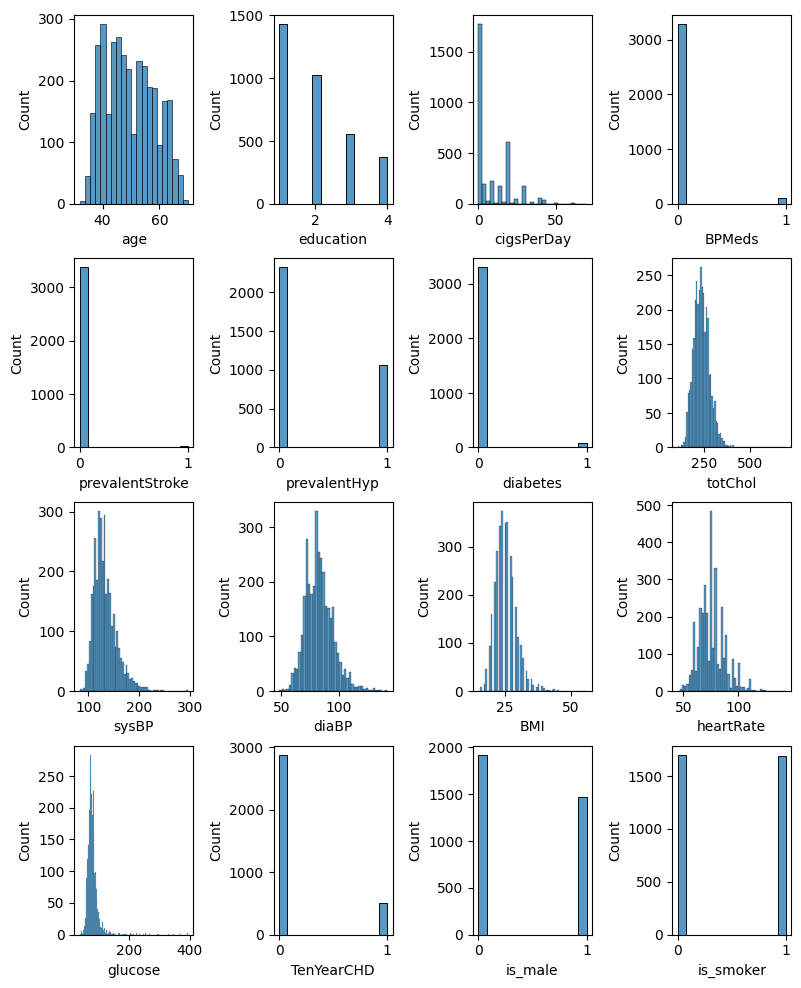

In [29]:
# analyzing the distribution of variables
fig = plt.figure(figsize = (8,24))
idx = 1


for var in columns_num:
  plt.subplot(10,4,idx)
  sns.histplot(df[var])
  idx += 1

plt.tight_layout(pad = 0.5, h_pad = 0.5, w_pad = 0.5)

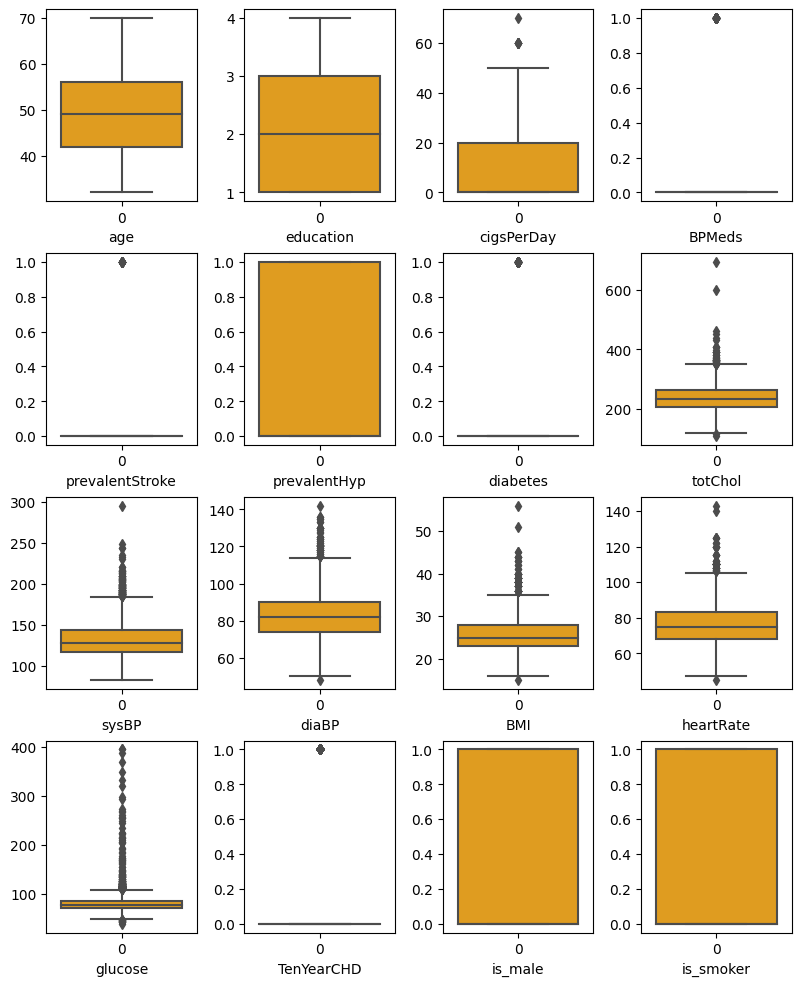

In [30]:
# Checking for outliers (outside 75% + 1.5 IQR)

fig = plt.figure(figsize = (8,24))
idx = 1

for var in columns_num:
  # plt.subplots(figsize = (6,6))
  plt.subplot(10,4,idx)
  sns.boxplot(df[var],color='orange')
  plt.xlabel(var)
  idx += 1

plt.tight_layout(pad = 0.5, h_pad = 0.5, w_pad = 0.5)

The data points classified as outliers either belong to the imbalanced class with lesser occurance or are most likely the imputed data points, for most of the varibles. 

### What all manipulations have you done and insights you found?

We have imputed all the NaN/missing values in the dataset, though there were not more than 10 percent of such values for any of the variable. And most of the NaN values were found to be only in numerical variables itself. We have not performed the scaling or normalization of the data yet, but we will be performing that as well. 

There is major class imbalance found to be in the target variable, and additionaly scarcity is also found in some other variables as well, like `BPMeds`, `prevalantStroke`, and `diabetes`, which need to be handled as well.


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## BIVARIATE ANALYSIS

#### Chart - 1

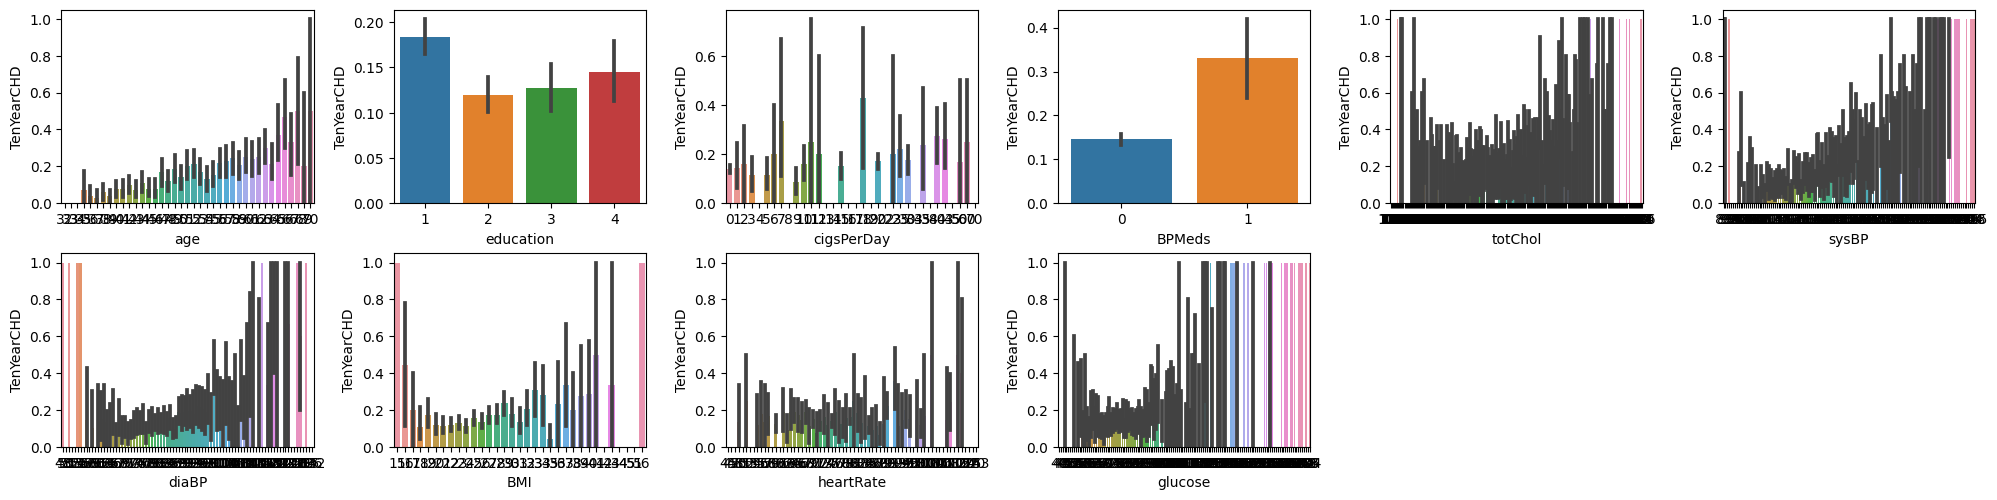

In [31]:
# Chart - 1 visualization code
# df.plot.scatter(x='age',y='totChol')

fig = plt.figure(figsize = (20,24))
idx = 1

# plot all the variables except the id variables
for var, values in list(var_unique.items())[1:]:
  # plot only the non-binary class and continuous features 
  if len(values) > 2:
    # print(var,' : ',values)
    plt.subplot(10,6,idx)
    sns.barplot(data = df, y='TenYearCHD',x=var)
    idx += 1

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

To get some of the basic insights about the pattern formed and relativity of all the features against the target variable.  

##### 2. What is/are the insight(s) found from the chart?

As the age gets higher the CHD risk also increases linearly, the lowest score of education portrays the highest risk, cigarettes per day do not give a definitive pattern, and whether the person requires Blood Pressure medication or not also tells the amount of risk associated. Systolic and Diastolic BP measure also show almost a linear relation with the target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The heuristic drawn regarding the relation of features provide us a basic insight regarding the direction of exploration, and hence which will be followed to gain in-depth knowledge about the dataset here.

#### Chart - 2

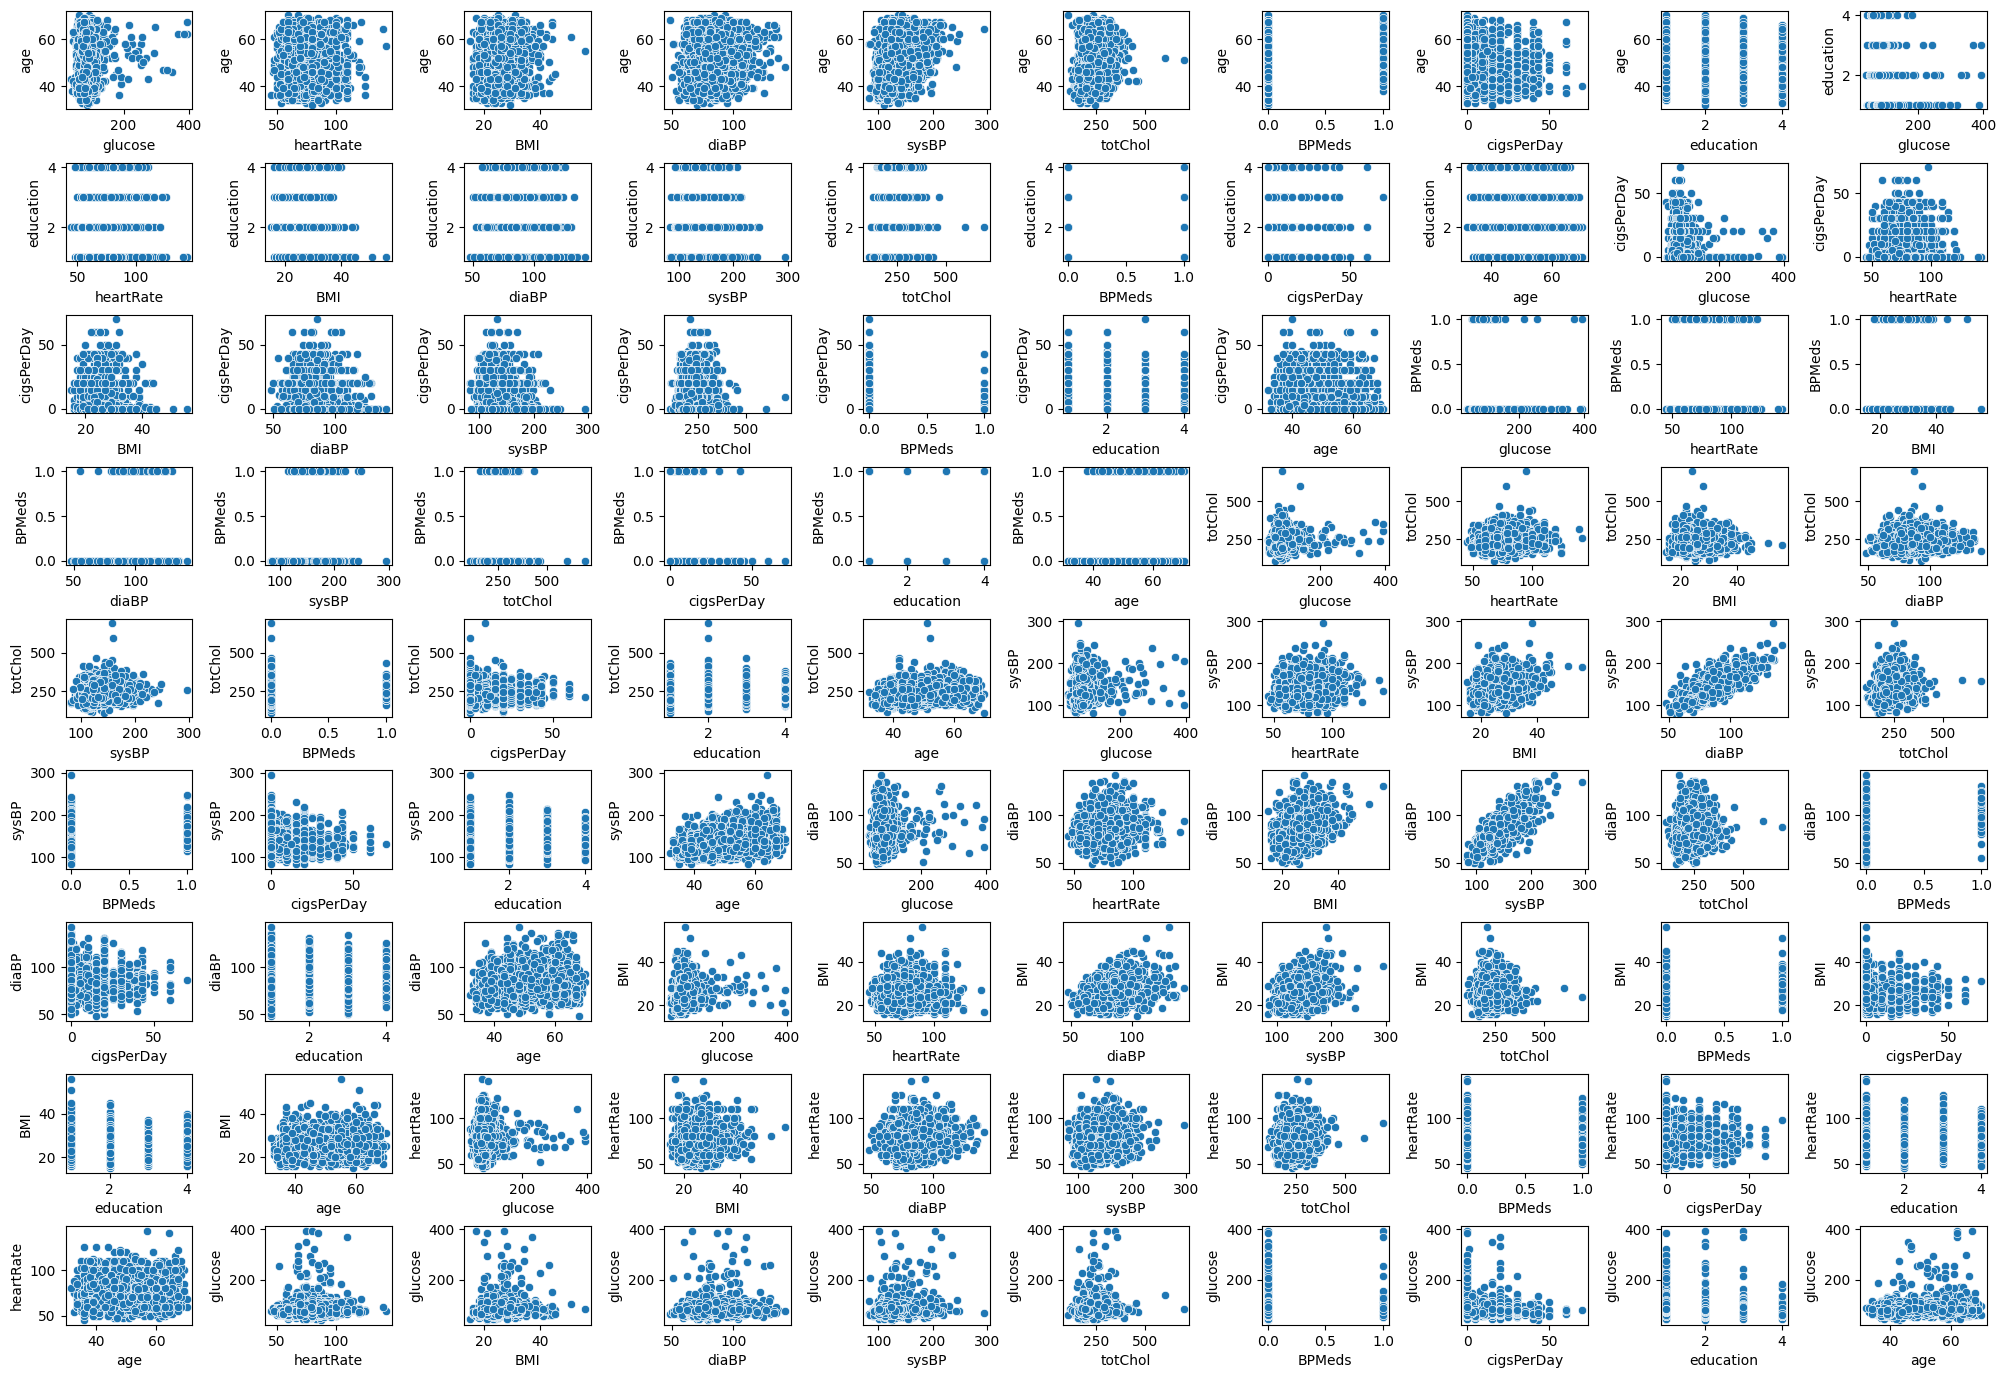

In [32]:
# Chart - 2 visualization code

fig = plt.figure(figsize = (20,30))
idx = int(1)

# get the list of all possible mapped combinations for all varibles
var_unique_list = list(var_unique.items())[1:]

for var1, values1 in var_unique_list:
  for var2, values2 in var_unique_list[::-1]:
    # ploting all except the same variables and te target variable
    if (len(values1) > 2 and len(values2) > 2) and var1 != var2 and (var1 != 'TenYearCHD' and var2 != 'TenYearCHD') :
      # defining the number of rows and columns and plotting by index 
      plt.subplot(20,10,idx)
      # print(var1,' : ',var2)
      sns.scatterplot(data = df, y=var1, x=var2)
      idx += 1

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

To gather the specifics about the features all at once and for gaining a gist of the relation between them.

##### 2. What is/are the insight(s) found from the chart?

The overall representation and trend of the variables/features provided.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- If BMI normal then heartRate is normal 
- Age is an important factor
- Glucose and diabetes are correlated
- Higher heartRate show higher risk.

#### Chart - 3

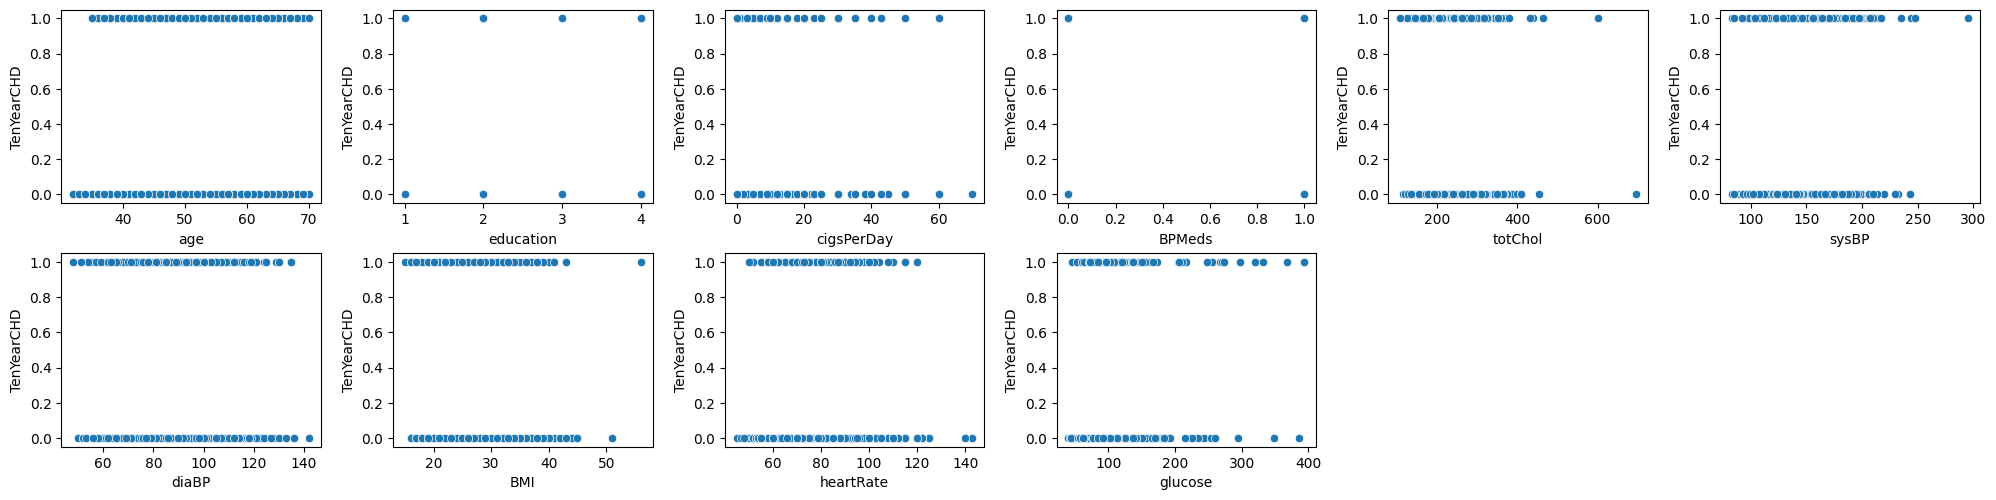

In [33]:
# Chart - 3 visualization code

fig = plt.figure(figsize = (20,24))
idx = 1
for var, values in list(var_unique.items())[1:]:
  if len(values) > 2:
    # print(var,' : ',values)
    plt.subplot(10,6,idx)
    sns.scatterplot(data = df, y='TenYearCHD',x=var)
    idx += 1

plt.tight_layout(pad = 0.5, h_pad=0.5, w_pad = 0.5)

##### 1. Why did you pick the specific chart?

To get to know about the spread of data points we have across the datast with respect to the target variable.

##### 2. What is/are the insight(s) found from the chart?

The basic idea behind this visualization is to check the spread of data in terms of target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The basic idea behind this visualization is to check the spread of data in terms of target variable.

## ANALYZING FEATURES SPECIFICALLY

#### Chart - 4

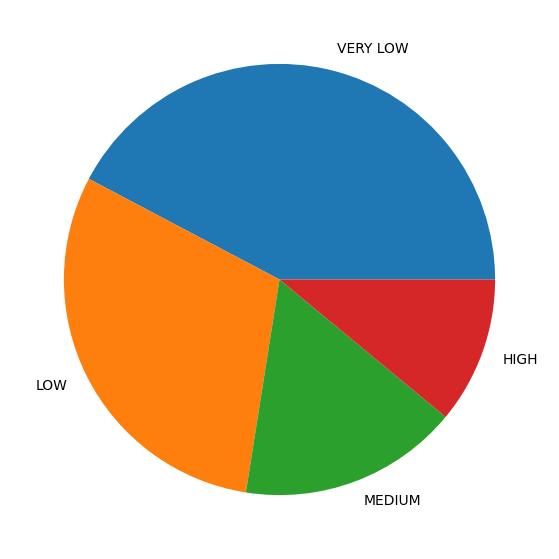

In [34]:
# Chart - 4 visualization code

pie_values = df['education'].value_counts().sort_index().values
labels = ['VERY LOW', 'LOW', 'MEDIUM', 'HIGH'] 
fig = plt.figure(figsize =(10, 7))

plt.pie(pie_values, labels = labels)
plt.show()

In [35]:
edu_bracket = df['education'].apply(lambda e: 'VERY LOW' if e == 1 else ('LOW' if e == 2 else ('MEDIUM' if e == 3 else 'HIGH')))
edu_v_cigs = pd.concat([edu_bracket,df['cigsPerDay']], axis = 1)

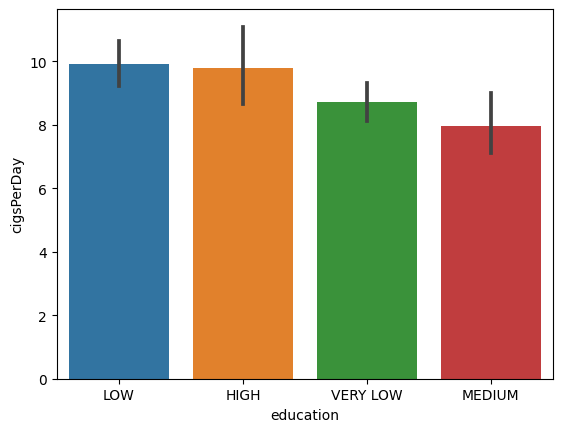

In [36]:
sns.barplot(data = edu_v_cigs,x = 'education', y = 'cigsPerDay')
plt.show()

In [37]:
# clearing the temporary dataframe from memory
del edu_v_cigs

In [38]:
edu_v_dbts = pd.concat([edu_bracket,df['diabetes']], axis = 1)

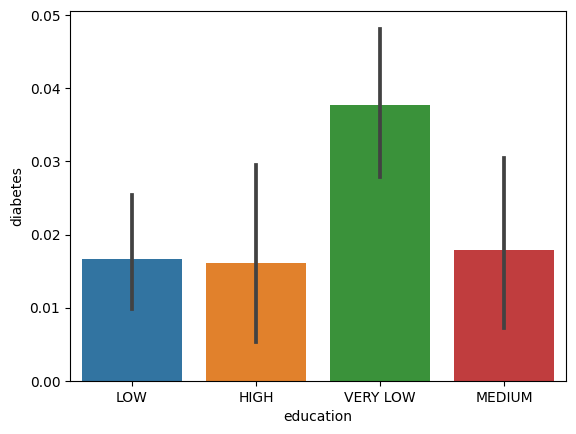

In [39]:
sns.barplot(data = edu_v_dbts, x = 'education', y = 'diabetes')
plt.show()

In [40]:
# clearing the temporary dataframe from memory
del edu_v_dbts

In [41]:
edu_v_stroke = pd.concat([edu_bracket, df['prevalentStroke']],axis = 1)

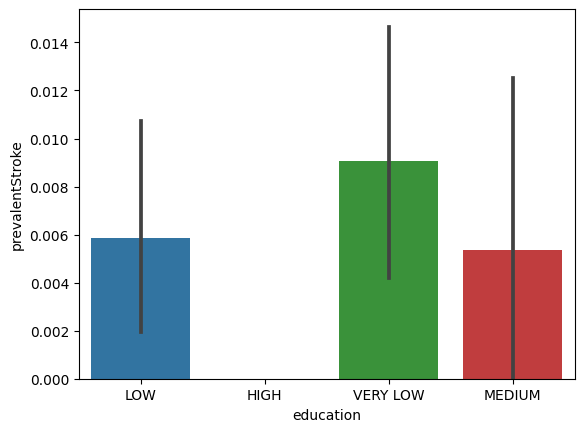

In [42]:
sns.barplot(data = edu_v_stroke, x = 'education', y = 'prevalentStroke')
plt.show()

In [43]:
# clearing the temporary dataframe from memory
del edu_v_stroke

In [44]:
edu_v_hyp = pd.concat([edu_bracket, df['prevalentHyp']],axis = 1)

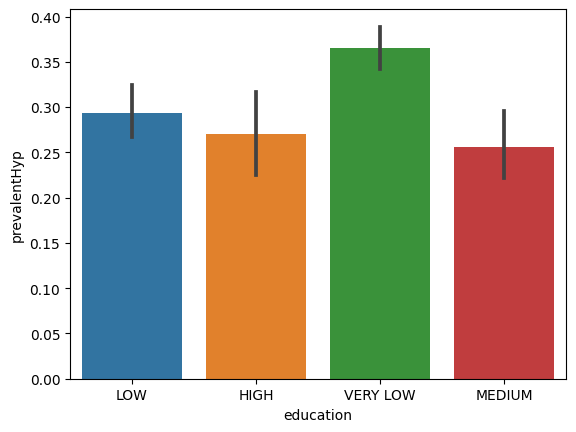

In [45]:
sns.barplot(data = edu_v_hyp, x = 'education', y = 'prevalentHyp')
plt.show()

In [46]:
# clearing the temporary dataframe from memory
del edu_v_hyp

In [47]:
edu_v_CHD = pd.concat([edu_bracket, df['TenYearCHD']],axis = 1)

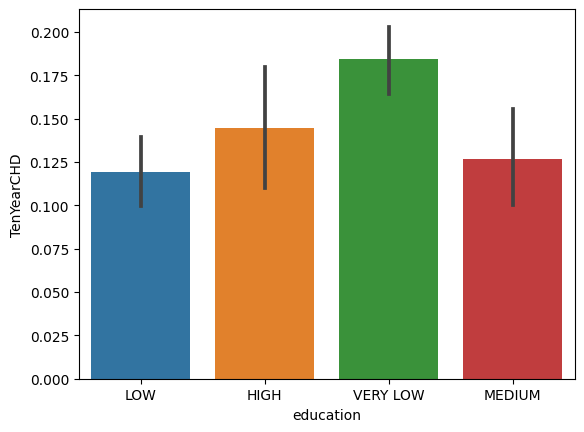

In [48]:
sns.barplot(data = edu_v_CHD, x = 'education', y = 'TenYearCHD')
plt.show()

In [49]:
edu_v_CHD['TenYearCHD'].unique()

array([1, 0])

In [50]:
# clearing the temporary dataframe from memory
del edu_v_CHD

##### 1. Why did you pick the specific chart?

To know about the educational status of the people under observation and how it affects their health, and see if it does in any manner.

##### 2. What is/are the insight(s) found from the chart?

Majorly the data presents that the noticable amount of population belongs to the lowest education score group. And the people with the highest education are less occuring as compared to the other groups.
The population with lower education score can be observed to be highly prone to CHD as compared to others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Combining the low and very low group of the visualization account for more than medium and high clubbed together. This results in an interpretation that the lower bracket of education occurs more often than the others, but still there is not any literal translation provided for the status of education such as degree or years of education or whether it is full time or correspondence.

So it can be just seen as a ordinary rating that gives a mundane idea regarding the education of the person provided as a data point for this visualization.

Finally from all the visualizations it can be concluded that the population with the lower education score have higher diabetes levels and unhealthy glucose levels as well, along with a history of prevalentStroke and hyper tension as well.

#### Chart - 5

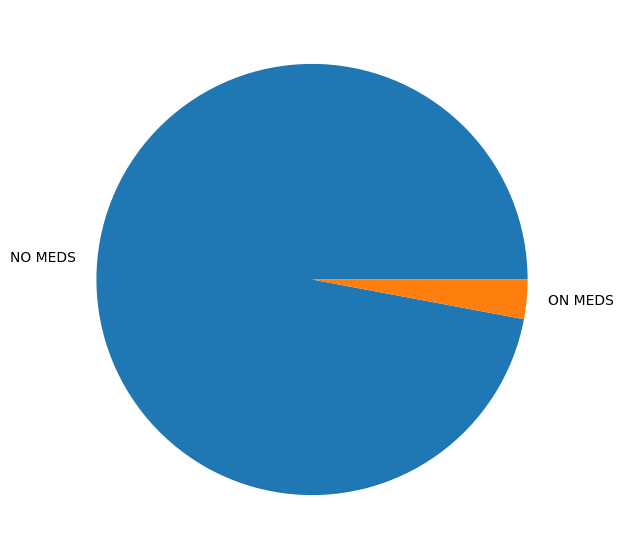

In [51]:
# Chart - 5 visualization code

pie_values = df['BPMeds'].value_counts().sort_index().values
labels = ['NO MEDS', 'ON MEDS'] 
fig = plt.figure(figsize =(10, 7))

plt.pie(pie_values, labels = labels)
plt.show()

In [52]:
# Get the BP Meds converted to string for plotting purposes
meds_bracket = df['BPMeds'].apply(lambda m: 'ON MEDS' if m == 1 else 'NO MEDS')

In [53]:
med_v_edu = pd.concat([meds_bracket,df['education']],axis = 1)

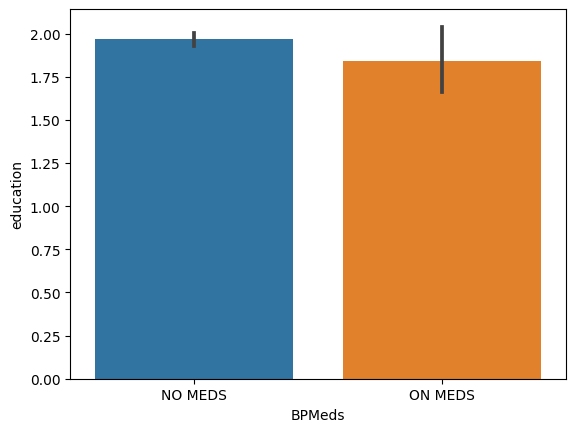

In [54]:
sns.barplot(data = med_v_edu, x = 'BPMeds',y = 'education')
plt.show()

In [55]:
# clearing the temporary dataframe from memory
del med_v_edu

In [56]:
med_v_dbs = pd.concat([meds_bracket,df['diabetes']],axis = 1)

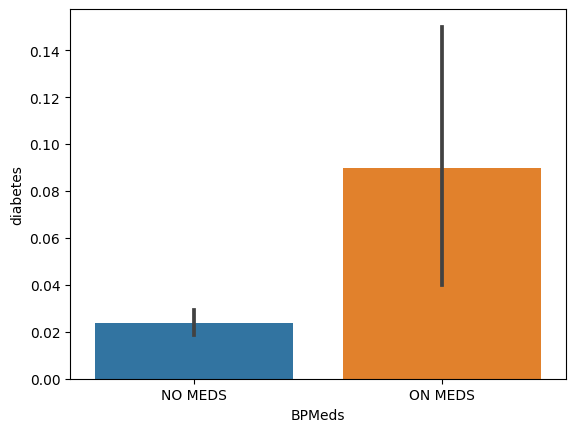

In [57]:
sns.barplot(data = med_v_dbs, x = 'BPMeds',y = 'diabetes')
plt.show()

In [58]:
# clearing the temporary dataframe from memory
del med_v_dbs

In [59]:
med_v_chol = pd.concat([meds_bracket,df['totChol']],axis = 1)

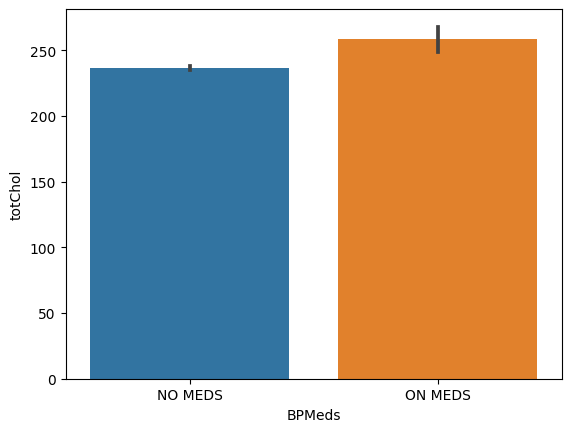

In [60]:
sns.barplot(data = med_v_chol, x = 'BPMeds',y = 'totChol')
plt.show()

In [61]:
# clearing the temporary dataframe from memory
del med_v_chol

##### 1. Why did you pick the specific chart?

To gain insights about the proportion of observations that are under medication for abnormalities in Blood Pressure.

##### 2. What is/are the insight(s) found from the chart?

Maximum amount of population belong to the not on medication portion.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even if we consider the imputed values, which comprise hardly a one digit percentage unit of the total population, the maximum amount of population belong to the not on medication portion. As there would not be any significant change even after we assume that the imputed values were completely imputed to the ON MEDICATION portion of the population, the percentage remains unaffected.

#### Chart - 6

In [62]:
# Getting the count of binned age values
age_bracket_sum = df['age'].apply(lambda a: 0 if (a <=20) else (1 if (a >20 and a <= 40) else (2 if (a>40 and a <=60) else 3))).value_counts().sort_index()

In [63]:
age_bracket_sum

1     604
2    2324
3     462
Name: age, dtype: int64

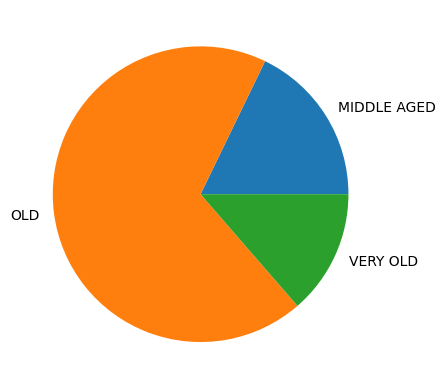

In [64]:
# Chart - 6 visualization code

# NO one is present from the YOUNG age bracket
labels = ['MIDDLE AGED', 'OLD', 'VERY OLD'] 
# fig = plt.figure(figsize =(10, 7))


plt.pie(age_bracket_sum, labels = labels)
plt.show()


In [65]:
# Getting the binned format of age of data points
age_bracket = df['age'].apply(lambda a: 'YOUNG' if (a <=20) else ('MIDDLE AGED' if (a >20 and a <= 40) else ('OLD' if (a>40 and a <=60) else 'VERY OLD')))

In [66]:
age_bracket.value_counts()

OLD            2324
MIDDLE AGED     604
VERY OLD        462
Name: age, dtype: int64

In [67]:
age_v_hyp = pd.concat([age_bracket, df['prevalentHyp']], axis = 1)

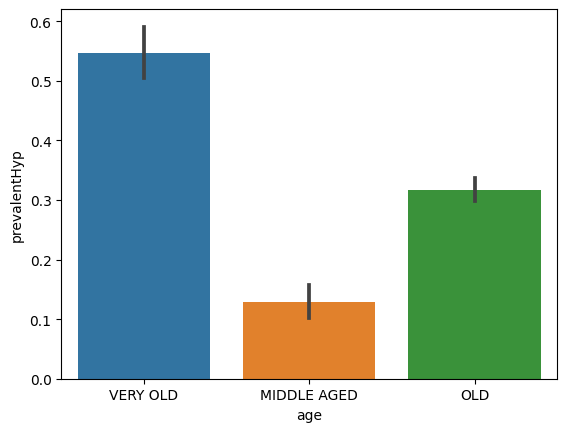

In [68]:
sns.barplot(data = age_v_hyp, x = 'age',y = 'prevalentHyp')
plt.show()

In [69]:
del age_v_hyp

In [70]:
age_v_stroke = pd.concat([age_bracket, df['prevalentStroke']], axis = 1)

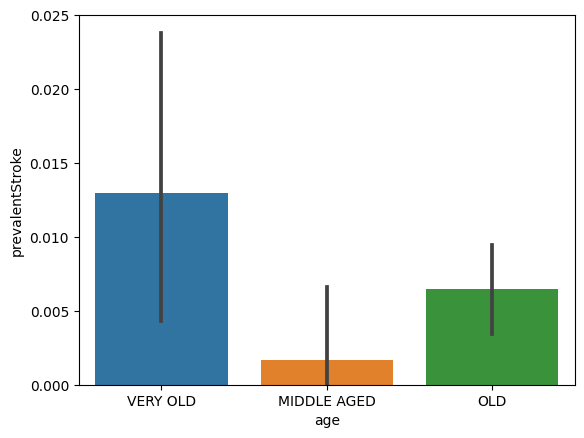

In [71]:
sns.barplot(data = age_v_stroke, x = 'age',y = 'prevalentStroke')
plt.show()

In [72]:
del age_v_stroke

In [73]:
age_v_BMI = pd.concat([age_bracket, df['BMI']], axis = 1)

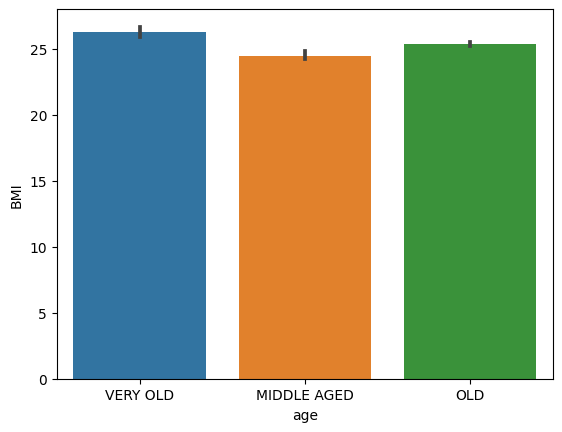

In [74]:
sns.barplot(data = age_v_BMI, x = 'age',y = 'BMI')
plt.show()

In [75]:
# clearing the temporary dataframe from memory
del age_v_BMI

In [76]:
# heartRate

In [77]:
age_v_heart = pd.concat([age_bracket, df['heartRate']], axis = 1)

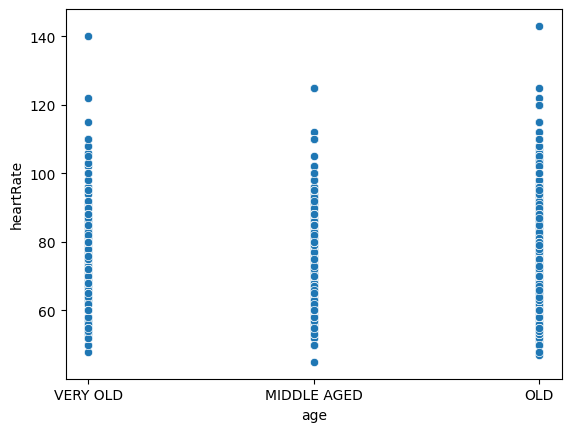

In [78]:
sns.scatterplot(data = age_v_heart, x = 'age',y = 'heartRate')
plt.show()

In [79]:
# clearing memory
del age_v_heart

##### 1. Why did you pick the specific chart?

To acknowledge about the data based on age of the data points provided.

##### 2. What is/are the insight(s) found from the chart?

The percentage of middle aged category is very higher as compared to the young and old category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here the majority of the observations belong to the Old category. The Very old aged and middle aged follow. And observations provide the idea that most of the time old aged beings can discover the symptoms related to or leading to the cardiovascular diseases.

The `very old` category can be seen to have greatest occurrence for prevalentStroke, and also can be observed to be having a higher heartRate comparatively.

#### Chart - 7

In [80]:
cigs_bracket_sum = df['cigsPerDay'].apply(lambda a: 0 if (a==0) else (1 if (a <=10) else (2 if (a >10 and a <= 20) else (3 if (a>20 and a <=30) else 4)))).value_counts().sort_index()

In [81]:
# cheking the bins to form labels later
cigs_bracket_sum

0    1707
1     506
2     810
3     227
4     140
Name: cigsPerDay, dtype: int64

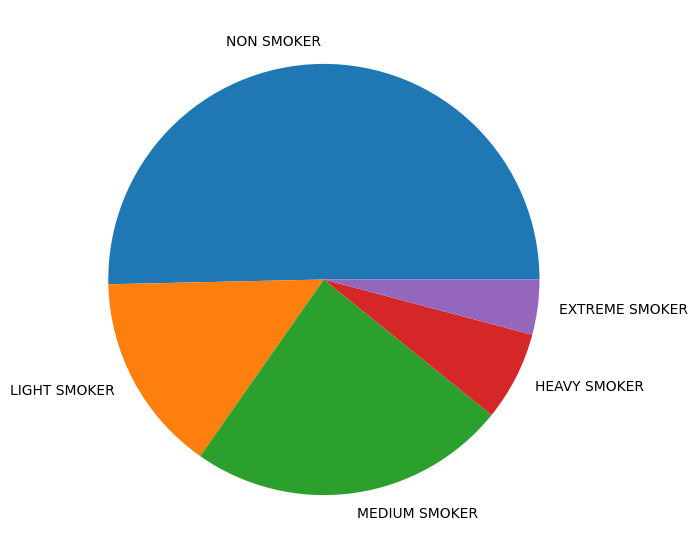

In [82]:
# Chart - 7 visualization code

labels = ['NON SMOKER','LIGHT SMOKER', 'MEDIUM SMOKER', 'HEAVY SMOKER', 'EXTREME SMOKER'] 
fig = plt.figure(figsize =(10, 7))

plt.pie(cigs_bracket_sum, labels = labels)
plt.show()

In [83]:
cigs_bracket = df['cigsPerDay'].apply(lambda a: 'NON SMOKER' if (a==0) else ('LIGHT SMOKER' if (a <=10) else ('MEDIUM SMOKER' if (a >10 and a <= 20) else ('HEAVY SMOKER' if (a>20 and a <=30) else 'EXTREME SMOKER'))))

In [84]:
cigs_v_heart = pd.concat([cigs_bracket, df['heartRate']], axis = 1)

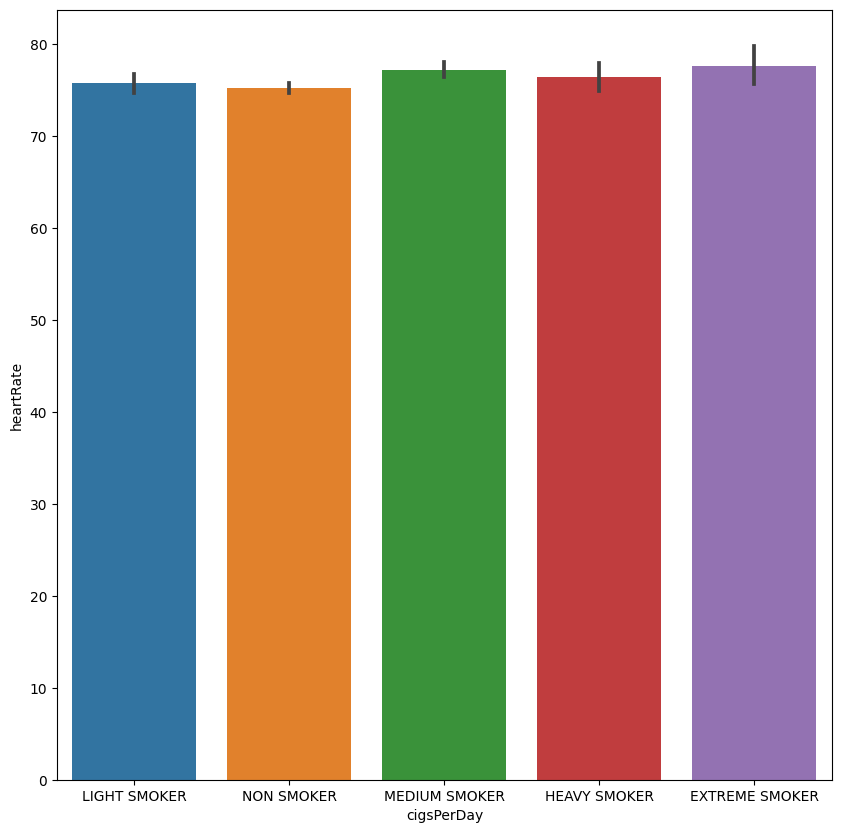

In [85]:
plt.figure(figsize = (10,10))
sns.barplot(data = cigs_v_heart, x = 'cigsPerDay',y = 'heartRate')
plt.show()

In [86]:
# clearing temporary dataframe
del cigs_v_heart

In [87]:
cigs_v_age = pd.concat([cigs_bracket, df['age']], axis = 1)

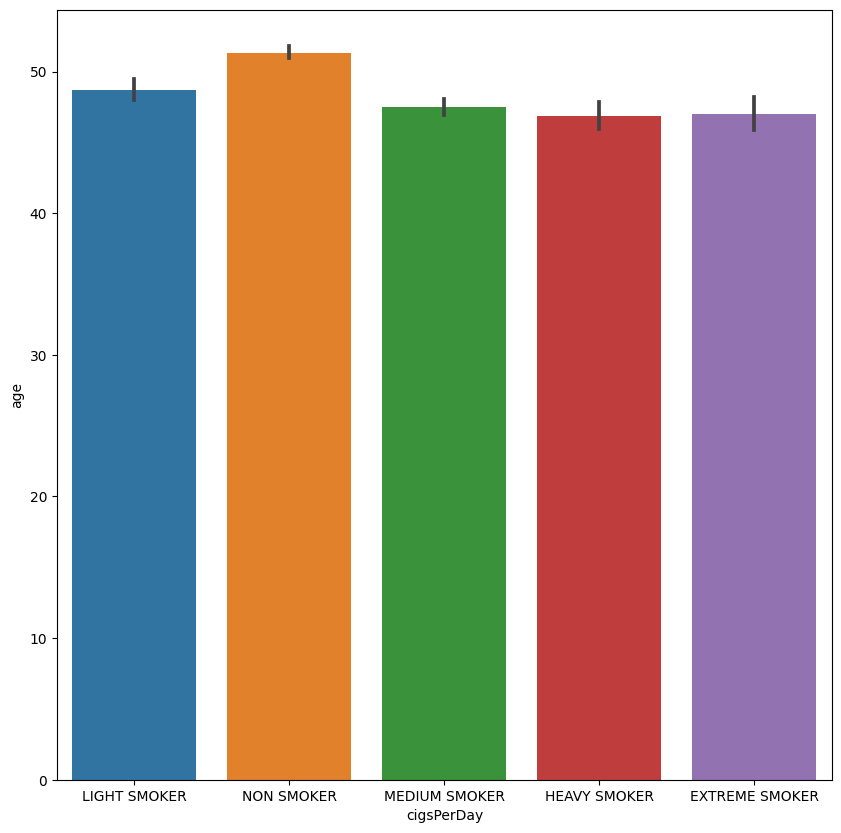

In [88]:
plt.figure(figsize = (10,10))
sns.barplot(data = cigs_v_age, x = 'cigsPerDay',y = 'age')
plt.show()

In [89]:
cigs_v_edu = pd.concat([cigs_bracket, df['education']], axis = 1)

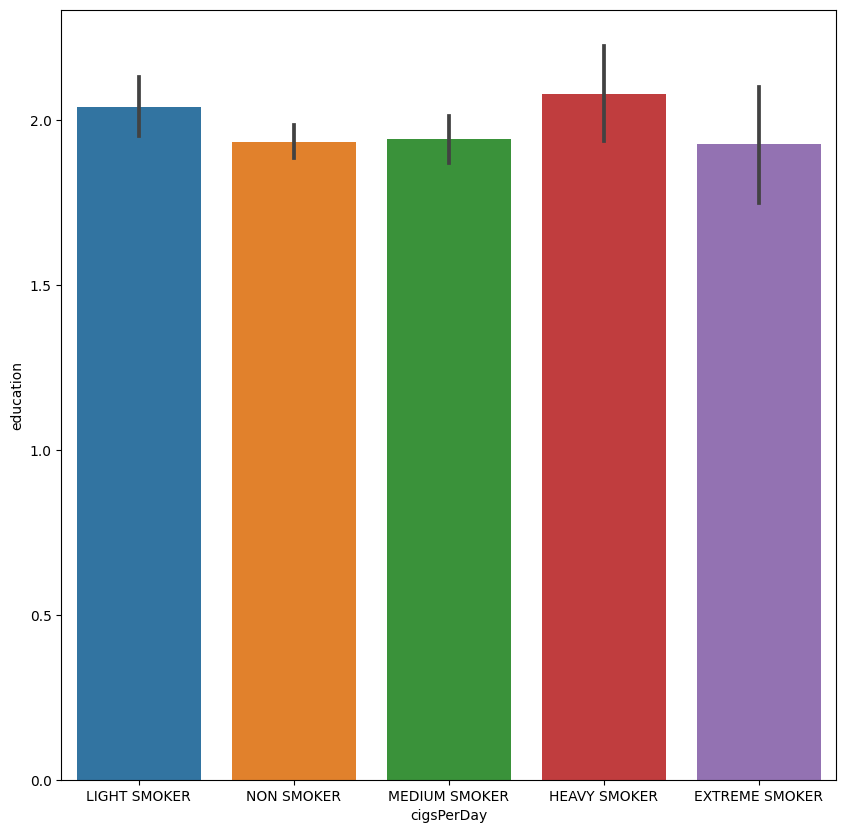

In [90]:
plt.figure(figsize = (10,10))
sns.barplot(data = cigs_v_edu, x = 'cigsPerDay',y = 'education')
plt.show()

In [91]:
del cigs_v_edu

In [92]:
df.columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'is_male', 'is_smoker'],
      dtype='object')

##### 1. Why did you pick the specific chart?

To gain insights about the smokers after divinding them into a certain set of categories based on the number of cigarettes smoked by the person per day.

##### 2. What is/are the insight(s) found from the chart?

About half of the people belong to the non smoking category and then we have the Light smoker and medium smoker category which exists in the dataset with a noticeable percentage. And in that category the person mostly smokes 3 to 12 or 13 to 21 cigarettes. Whereas the extreme smoking category has smokers which smoke cigarettes ranging from 40 to 70 cigarettes.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The data points labeled as extreme smokers are of very less percentage as compared to the average poputaion of smokers, as it is not physically possible as it can only be an extreme case where a person suffers with a case of addiction and smoker a significantly higher amount of cigrettes per day. 

Hence, that can in itself become a deciding factor if a individual has a risk of Cardiovascular disease or not.

## MULTIVARIATE ANALYSIS

#### Chart - 14 - Correlation Heatmap

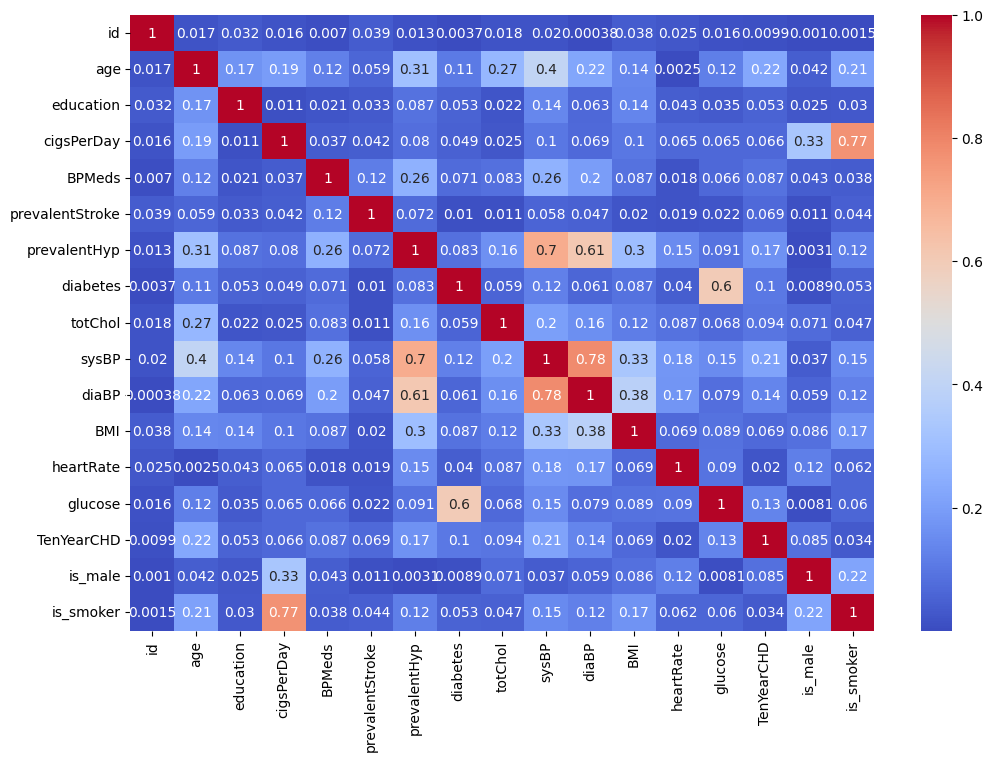

In [93]:
# Correlation Heatmap visualization code
plt.figure(figsize = (12,8))
sns.heatmap(abs(df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the correlation between the variables and especially the relativity of the target variable.

##### 2. What is/are the insight(s) found from the chart?

There can be seen that there is considerable amount of multicollinearity between the variables `glucose` and `diabetes`, `is_smoker` and `cigsPerDay`, `prevalantHyp` and `sysBP`, `prevalantHyp` and `diaBP`, `diaBP` and `sysBP`.


In medical terms as well the higher the level of glucose in the body means the sucrose present in the body, if more than the limit body can handle leads to diabetes. 

In terms of smoking and hypertension it can be mostly observed based on the historical data that men constitute the higher percentage of the population.

Diastolic measure and Systolic measure are the metrics provided from a single machinery and hence both rise and fall with a specific ratio in any real life scenario. 

#### Chart - 15 - Pair Plot 

In [94]:
# Pair Plot visualization code
# sns.pairplot(df, hue = 'TenYearCHD')
# plt.show()

##### Why did you pick the specific chart?

To gain insights about the dataset in terms on relativity for each variable with respect to the target variable with different set of visulizations for each and every variable provided to be plotted versus the target variable.

## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

In [95]:
# Already Handled the Missing Values & Missing Value using Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### Handling Outliers

In [96]:
# No outliers were to be found specifically 
# and the data points interpreted as outliers during analysis are due to the heavy class imbalance in dataset initially
# which can be clearly seen in the target variable TenYearCHD

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### Categorical Encoding

In [97]:
# Encoding done already

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### Feature Manipulation & Selection

#### Handling Class Imbalance

In [98]:
def apply_smote(df,target):
  smote = SMOTE()
  x_smote, y_smote = smote.fit_resample(df[[i for i in df.columns if i not in [target]]],df[target])
  return x_smote, y_smote

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

For handling the dataset imbalance we have used the SMOTE (Synthetic Minority OverSampling TEchnique) to perform oversampling. The reason we chose oversampling over cost sensitive learning using SVM or undersampling is because:
1. The dataset does not have any clear distinctive patterns to work on if we apply cost sensitive learning on the dataset, but the application on the dataset can be tested later.
2. While performing undersampling, there is a high possibility that we can lose some of the important data patterns or data points. Having more data to train the model ultimately has more benefits than losses as we can adjust the model if there is overfitting but it will be difficult to tackle issues associated with undersampling when the problems like loss of overall performance, biased model due to sample set limitation, etc occur. 

#### Feature Manipulation

In [99]:
# Manipulate Features to minimize feature correlation and create new features
xst,yst = apply_smote(df,'TenYearCHD') 
temp_df = pd.concat([xst,yst],axis = 1)

In [100]:
temp_df.drop(columns = ['id'], inplace = True, errors = 'ignore')

In [101]:
# Getting the people with higher age and high sysBP measure
# temp_df['highBPAge'] = 0
# temp_df['highBPAge'] = temp_df.apply(lambda x: 1 if (x['sysBP'] >= 140 and x['age'] >= 50) else 0,axis = 1)

In [102]:
# df['highBPAge'] = temp_df['highBPAge']

In [103]:
# temp_df['highBPAge'].value_counts()

merging the is_smoker and cigsPerDay

In [104]:
df['cigsPerDaySmoker'] = temp_df['cigsPerDay'] * temp_df['is_smoker']

dropping the `is_smoker` and `cigsPerDay` columns because the functionality of it  will be covered in the `cigsPerDaySmoker` i.e, if the person is not a smoker then cigsPerDay = 0 and is_smoker = 0 as well.

In [105]:
# using errors = 'ignore' to conditionally drop the columns and avoid errors
df.drop(columns = ['is_smoker','cigsPerDay'], axis = 1,errors='ignore',inplace = True)

Checking the mean age vs the person current age gap

In [106]:
df['age'].describe()

count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [107]:
# instead of using sysBP and diaBP seperately we can use Mean Arterial Pressure `(maP = (sysBP + (2 * diaBP))/3)` 
# or just Pulse Pressure (pp = sysBP - diaBP) 
# and use the resultant while still preserving the essence of both variables

In [108]:
temp_df['maP'] = (temp_df['sysBP'] + (2 * temp_df['diaBP']))/3

In [109]:
df['maP'] = temp_df['maP']

In [110]:
temp_df['maP'].describe()

count    5758.000000
mean      101.572942
std        14.326650
min        62.333333
25%        91.666667
50%        99.666667
75%       109.666667
max       188.333333
Name: maP, dtype: float64

In [111]:
df.head()

,id,age,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,is_male,cigsPerDaySmoker,maP
0,0,64,2,0,0,0,0,221,148,85,24,90,80,1,0,3,106.000000
1,1,36,4,0,0,1,0,212,168,98,29,72,75,0,1,0,121.333333
2,2,46,1,0,0,0,0,250,116,71,20,88,94,0,0,10,86.000000
3,3,50,1,0,0,1,0,233,158,88,28,68,94,1,1,20,111.333333
4,4,64,1,0,0,0,0,241,136,85,26,70,77,0,0,30,102.000000


Deleting the temporary variables

In [112]:
del xst,yst,temp_df

#### Feature Selection

In [113]:
# Select your features wisely to avoid overfitting
df.drop(columns = ['id'],inplace = True, errors = 'ignore')

In [114]:
df.select_dtypes(include = ['float64','int64']).columns

Index(['age', 'education', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'is_male', 'cigsPerDaySmoker', 'maP'],
      dtype='object')

### Data Splitting

In [115]:
# Split your data to train and test. Choose Splitting ratio wisely.
def split_XY_from_df(df,target):
  X = df[[i for i in df.describe().columns if i not in [target]]]
  y = df[target]
  return X,y

In [116]:
# X and y without class balancing
X,y = split_XY_from_df(df,'TenYearCHD')

In [117]:
# X and y with class balancing
x_smote, y_smote = apply_smote(df,'TenYearCHD')

In [118]:
len(y_smote)

5758

In [119]:
y_smote.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

#### Looking for the feature importance

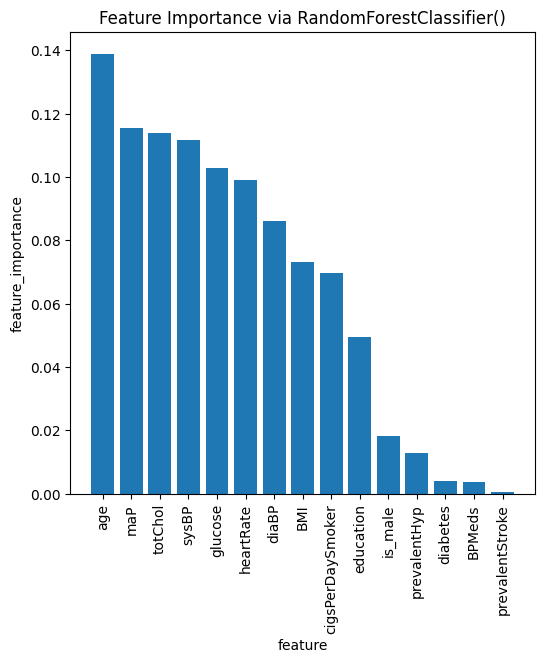

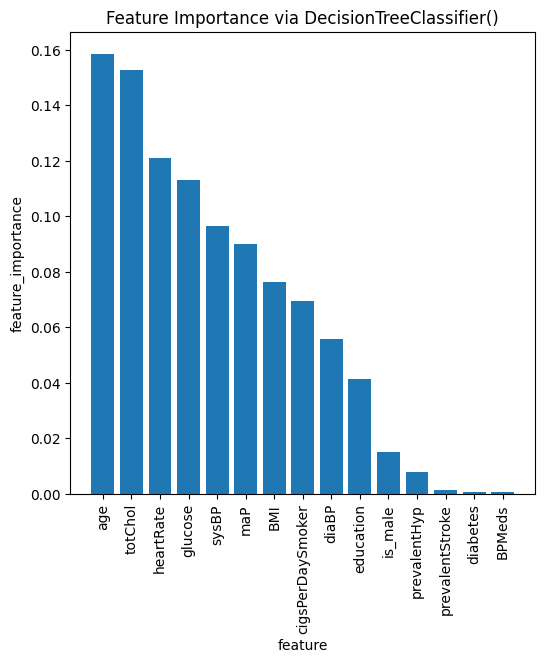

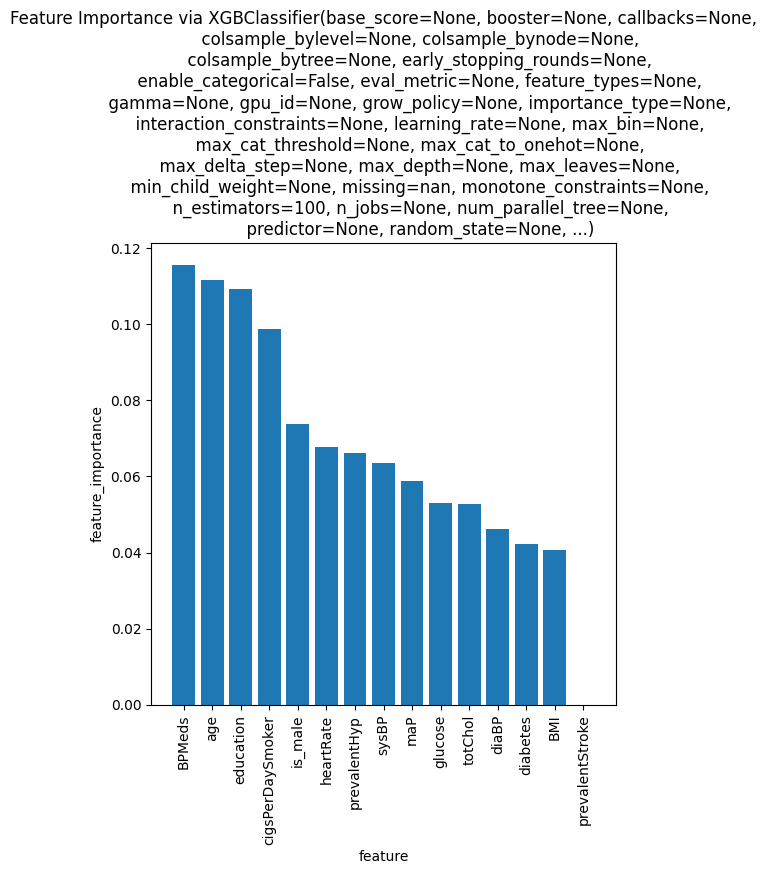

In [120]:
models = [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]
# Analysing feature importance
# barplot based on feature importance
for model in models:
  # fitting the model
  model.fit(x_smote,y_smote)

  # gathering the feature importances
  imp = model.feature_importances_

  imp_df = pd.DataFrame({'feature':x_smote.columns,'feature_importance':imp})
  # sort the importance in descending order
  imp_df = imp_df.sort_values('feature_importance',ascending = False)

  # plotting barplot
  plt.figure(figsize = (6,6))
  plt.bar(imp_df['feature'],imp_df['feature_importance'])
  plt.xticks(rotation = 90)
  plt.xlabel('feature')
  plt.ylabel('feature_importance')
  plt.title(f'Feature Importance via {model}')
  plt.show()


#### Select the features according to their importance

In [121]:
exclude = ['prevalentStroke','diabetes','diaBP','sysBP','BPMeds','id']

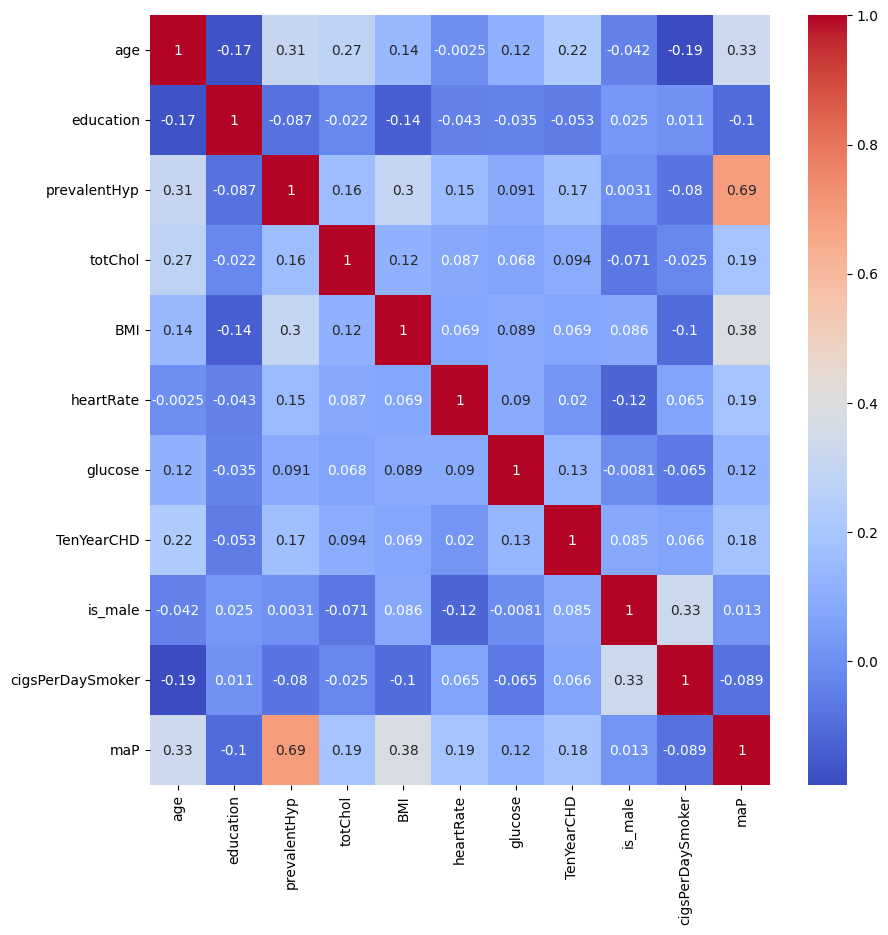

In [122]:
plt.figure(figsize = (10,10))
sns.heatmap(df[[i for i in df.columns if i not in exclude]].corr(),cmap = 'coolwarm', annot = True)
plt.show()

In [123]:
# After considering the importance of features 
# the features are selected for the proceeding further
x_smote, y_smote = apply_smote(df[[i for i in df.columns if i not in exclude]],'TenYearCHD')

In [124]:
x_smote.head()

,age,education,prevalentHyp,totChol,BMI,heartRate,glucose,is_male,cigsPerDaySmoker,maP
0,64,2,0,221,24,90,80,0,3,106.000000
1,36,4,1,212,29,72,75,1,0,121.333333
2,46,1,0,250,20,88,94,0,10,86.000000
3,50,1,1,233,28,68,94,1,20,111.333333
4,64,1,0,241,26,70,77,0,30,102.000000


### Data Scaling

In [125]:
# Scaling your data
scaler = MinMaxScaler()

Scaling the variables so that the performance improves and we are provided with a higher accuracy score

In [126]:
# Scaling all the features
x_smote_s = scaler.fit_transform(x_smote)

### Train Test Split

In [127]:
def get_train_test_split(X,y):
  return train_test_split(X, y, test_size=0.20, random_state=0)

In [128]:
X_train, X_test, y_train, y_test = get_train_test_split(x_smote_s, y_smote)

## ***ML Model Implementation***

In [180]:
# Defining a dataframe to store the model metrics
metrics = pd.DataFrame()

In [185]:
# defining the number of cores to be utilized
cores = 4

### ML Model - SVC

In [129]:
# defining the model
sv_model = SVC(class_weight='balanced')

In [130]:
sv_model.fit(X_train,y_train)

SVC(class_weight='balanced')

In [131]:
sv_pred = sv_model.predict(X_test)

In [132]:
print('SVC: AUC-ROC Score',roc_auc_score(y_test,sv_pred))
print('SVC: Accuracy Score',accuracy_score(y_test,sv_pred))

AUC-ROC Score 0.6931957119611649
Accuracy Score 0.6961805555555556


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [133]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
sv_params = {
    'class_weight': ['balanced',None],
    'kernel': ['linear','poly','sigmoid']
}

In [200]:
sv_grid = GridSearchCV(SVC(),sv_params, cv = 5, n_jobs = cores,verbose = 1)

In [201]:
sv_grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'class_weight': ['balanced', None],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             verbose=1)

In [202]:
sv_g = sv_grid.best_estimator_

In [203]:
svg_pred = sv_g.predict(X_test)

In [204]:
# storing the model merics
metrics = metrics.append({
    'model_name':sv_g,
    'AUC-ROC Score':roc_auc_score(y_test,sv_pred),
    'accuracy score': accuracy_score(y_test,sv_pred),
    'precision score': precision_score(y_test,sv_pred),
    'recall score': recall_score(y_test,sv_pred),
    'f1 score': f1_score(y_test,sv_pred),
    'AUC-ROC Score CV':roc_auc_score(y_test,svg_pred),
    'accuracy score CV': accuracy_score(y_test,svg_pred),
    'precision score CV': precision_score(y_test,svg_pred),
    'recall score CV': recall_score(y_test,svg_pred),
    'f1 score CV': f1_score(y_test,svg_pred)
},ignore_index = True)

In [205]:
metrics

,model_name,AUC-ROC Score,accuracy score,precision score,recall score,f1 score,AUC-ROC Score CV,accuracy score CV,precision score CV,recall score CV,f1 score CV
0,SVC(class_weight='balanced'),0.693196,0.696181,0.685544,0.767947,0.724409,NaN,NaN,NaN,NaN,NaN
1,SVC(kernel='poly'),0.693196,0.696181,0.685544,0.767947,0.724409,0.692356,0.692708,0.705882,0.701169,0.703518
2,"SVC(class_weight='balanced', kernel='poly')",0.693196,0.696181,0.685544,0.767947,0.724409,0.692844,0.693576,0.702970,0.711185,0.707054


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - LogisticRegression

In [136]:
lr_model = LogisticRegression()

In [137]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [138]:
lr_pred = lr_model.predict(X_test)

In [139]:
print('LogisticRegression: AUC-ROC Score',roc_auc_score(y_test,lr_pred))
print('LogisticRegression: Accuracy Score',accuracy_score(y_test,lr_pred))

AUC-ROC Score 0.6948621421477025
Accuracy Score 0.6961805555555556


In [140]:
# Confusion matrix to check True and False Postives and Negatives
confusion_matrix(y_test,lr_pred)

array([[366, 187],
       [163, 436]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [143]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [213]:
lr_params = {
    'C' : [0.1,1,10,100],
    'penalty' : ['l1','l2']
}

In [214]:
lr_grid = GridSearchCV(LogisticRegression(),lr_params, cv = 5, n_jobs = cores,verbose = 1)

In [215]:
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [216]:
lr_g = lr_grid.best_estimator_

In [217]:
lrg_pred = lr_g.predict(X_test)

In [218]:
metrics = metrics.append({
    'model_name':lr_g,
    'AUC-ROC Score':roc_auc_score(y_test,lr_pred),
    'accuracy score': accuracy_score(y_test,lr_pred),
    'precision score': precision_score(y_test,lr_pred),
    'recall score': recall_score(y_test,lr_pred),
    'f1 score': f1_score(y_test,lr_pred),
    'AUC-ROC Score CV':roc_auc_score(y_test,lrg_pred),
    'accuracy score CV': accuracy_score(y_test,lrg_pred),
    'precision score CV': precision_score(y_test,lrg_pred),
    'recall score CV': recall_score(y_test,lrg_pred),
    'f1 score CV': f1_score(y_test,lrg_pred),
    
},ignore_index = True)

In [219]:
metrics

,model_name,AUC-ROC Score,accuracy score,precision score,recall score,f1 score,AUC-ROC Score CV,accuracy score CV,precision score CV,recall score CV,f1 score CV
0,SVC(class_weight='balanced'),0.693196,0.696181,0.685544,0.767947,0.724409,NaN,NaN,NaN,NaN,NaN
1,SVC(kernel='poly'),0.693196,0.696181,0.685544,0.767947,0.724409,0.692356,0.692708,0.705882,0.701169,0.703518
2,"SVC(class_weight='balanced', kernel='poly')",0.693196,0.696181,0.685544,0.767947,0.724409,0.692844,0.693576,0.702970,0.711185,0.707054
3,LogisticRegression(),0.694862,0.696181,0.699839,0.727880,0.713584,0.694862,0.696181,0.699839,0.727880,0.713584
4,LogisticRegression(C=10),0.694862,0.696181,0.699839,0.727880,0.713584,0.694166,0.695312,0.700647,0.722871,0.711586


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - RandomForestClassifier

In [145]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
rf_model = RandomForestClassifier()

In [146]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [147]:
rf_pred = rf_model.predict(X_test)

In [148]:
print('RandomForestClassifier: AUC-ROC Score ',roc_auc_score(y_test,rf_pred))
print('RandomForestClassifier: Accuracy Score',accuracy_score(y_test,rf_pred))

RandomForestClassifier: AUC-ROC Score  0.8719505384199705
RandomForestClassifier: Accuracy Score 0.8732638888888888


In [149]:
confusion_matrix(rf_pred,y_test)

array([[464,  57],
       [ 89, 542]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [150]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [223]:
params_rf = {
    'max_depth': np.arange(7,12),
    # 'n_estimators': np.arange(100,400,100),
    'min_samples_split': np.arange(7,11),
    'min_samples_leaf': np.arange(7,11)
}

rf_ = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf_, param_grid = params_rf, cv = 5)

In [224]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([ 7,  8,  9, 10]),
                         'min_samples_split': array([ 7,  8,  9, 10])})

In [225]:
rf_g = rf_grid.best_estimator_

In [226]:
rfg_pred = rf_g.predict(X_test)

In [227]:
metrics = metrics.append({
    'model_name':rf_g,
    'AUC-ROC Score':roc_auc_score(y_test,rf_pred),
    'accuracy score': accuracy_score(y_test,rf_pred),
    'precision score': precision_score(y_test,rf_pred),
    'recall score': recall_score(y_test,rf_pred),
    'f1 score': f1_score(y_test,rf_pred),
    'AUC-ROC Score CV':roc_auc_score(y_test,rfg_pred),
    'accuracy score CV': accuracy_score(y_test,rfg_pred),
    'precision score CV': precision_score(y_test,rfg_pred),
    'recall score CV': recall_score(y_test,rfg_pred),
    'f1 score CV': f1_score(y_test,rfg_pred),
    
},ignore_index = True)

In [228]:
metrics

,model_name,AUC-ROC Score,accuracy score,precision score,recall score,f1 score,AUC-ROC Score CV,accuracy score CV,precision score CV,recall score CV,f1 score CV
0,SVC(class_weight='balanced'),0.693196,0.696181,0.685544,0.767947,0.724409,NaN,NaN,NaN,NaN,NaN
1,SVC(kernel='poly'),0.693196,0.696181,0.685544,0.767947,0.724409,0.692356,0.692708,0.705882,0.701169,0.703518
2,"SVC(class_weight='balanced', kernel='poly')",0.693196,0.696181,0.685544,0.767947,0.724409,0.692844,0.693576,0.702970,0.711185,0.707054
3,LogisticRegression(),0.694862,0.696181,0.699839,0.727880,0.713584,0.694862,0.696181,0.699839,0.727880,0.713584
4,LogisticRegression(C=10),0.694862,0.696181,0.699839,0.727880,0.713584,0.694166,0.695312,0.700647,0.722871,0.711586
5,"(DecisionTreeClassifier(max_depth=11, max_feat...",0.871951,0.873264,0.858954,0.904841,0.881301,0.791825,0.794271,0.774242,0.853088,0.811755


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - XGBClassifier

In [153]:
# ML Model - 4 Implementation

# Fit the Algorithm

# Predict on the model


In [ ]:
xg_model = XGBClassifier()

In [154]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
xg_pred = xg_model.predict(X_test)

In [156]:
print('XGBClassifier: AUC-ROC Score ',roc_auc_score(y_test,xg_pred))
print('XGBClassifier: Accuracy Score',accuracy_score(y_test,xg_pred))

RandomForestClassifier: AUC-ROC Score  0.8454491663320723
RandomForestClassifier: Accuracy Score 0.8463541666666666


In [157]:
confusion_matrix(xg_pred,y_test)

array([[455,  79],
       [ 98, 520]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [158]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [159]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


In [229]:
params_xg = {
    'max_depth': [2,7,11],
    'learning_rate': [0.1,0.01,0.001],
    'n_estimators': [50,100,200]
}

xg_grid = GridSearchCV(estimator = XGBClassifier(), param_grid = params_rf, n_jobs = cores, cv = 5)

In [230]:
xg_grid.fit(X_train,y_train)

[14:21:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'max_depth': array([ 7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([ 7,  8,  9, 10]),
                         'min_samples_split': array([ 7,  8,  9, 10])})

In [242]:
xg_g = xg_grid.best_estimator_

In [243]:
xg_g

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=7, min_samples_split=7,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [245]:
xfg_pred = xg_g.predict(X_test)

In [246]:
metrics = metrics.append({
    'model_name':xg_model,
    'AUC-ROC Score':roc_auc_score(y_test,xg_pred),
    'accuracy score': accuracy_score(y_test,xg_pred),
    'precision score': precision_score(y_test,xg_pred),
    'recall score': recall_score(y_test,xg_pred),
    'f1 score': f1_score(y_test,xg_pred),
    'AUC-ROC Score CV':roc_auc_score(y_test,xfg_pred),
    'accuracy score CV': accuracy_score(y_test,xfg_pred),
    'precision score CV': precision_score(y_test,xfg_pred),
    'recall score CV': recall_score(y_test,xfg_pred),
    'f1 score CV': f1_score(y_test,xfg_pred),
    
},ignore_index = True)

In [247]:
metrics

,model_name,AUC-ROC Score,accuracy score,precision score,recall score,f1 score,AUC-ROC Score CV,accuracy score CV,precision score CV,recall score CV,f1 score CV
0,SVC(class_weight='balanced'),0.693196,0.696181,0.685544,0.767947,0.724409,NaN,NaN,NaN,NaN,NaN
1,SVC(kernel='poly'),0.693196,0.696181,0.685544,0.767947,0.724409,0.692356,0.692708,0.705882,0.701169,0.703518
2,"SVC(class_weight='balanced', kernel='poly')",0.693196,0.696181,0.685544,0.767947,0.724409,0.692844,0.693576,0.702970,0.711185,0.707054
3,LogisticRegression(),0.694862,0.696181,0.699839,0.727880,0.713584,0.694862,0.696181,0.699839,0.727880,0.713584
4,LogisticRegression(C=10),0.694862,0.696181,0.699839,0.727880,0.713584,0.694166,0.695312,0.700647,0.722871,0.711586
5,"(DecisionTreeClassifier(max_depth=11, max_feat...",0.871951,0.873264,0.858954,0.904841,0.881301,0.791825,0.794271,0.774242,0.853088,0.811755
6,"(DecisionTreeClassifier(max_depth=11, max_feat...",0.845449,0.846354,0.841424,0.868114,0.854560,0.791825,0.794271,0.774242,0.853088,0.811755
7,"(DecisionTreeClassifier(max_depth=11, max_feat...",0.845449,0.846354,0.841424,0.868114,0.854560,0.791825,0.794271,0.774242,0.853088,0.811755
8,"XGBClassifier(base_score=None, booster=None, c...",0.845449,0.846354,0.841424,0.868114,0.854560,0.791825,0.794271,0.774242,0.853088,0.811755
9,"XGBClassifier(base_score=None, booster=None, c...",0.845449,0.846354,0.841424,0.868114,0.854560,0.880853,0.881944,0.870400,0.908180,0.888889


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - GaussianNB

In [167]:
nb_model = GaussianNB()

In [168]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [169]:
nb_pred = nb_model.predict(X_test)

In [170]:
print('GaussianNB: AUC-ROC Score ',roc_auc_score(y_test,nb_pred))
print('GaussianNB: Accuracy Score',accuracy_score(y_test,nb_pred))

RandomForestClassifier: AUC-ROC Score  0.6394171117021438
RandomForestClassifier: Accuracy Score 0.6354166666666666


In [171]:
confusion_matrix(nb_pred,y_test)

array([[409, 276],
       [144, 323]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [172]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [173]:
# Naive Bayes can not opt for HyperParameter tuning 

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***